In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [57]:
le = LabelEncoder()
model = LogisticRegression()
dt = DecisionTreeClassifier(criterion = 'entropy',random_state = 42)
scaler = StandardScaler()

In [58]:
df = pd.read_csv(r"C:\Users\Yagnesh Narola\Documents\Coding Languages\Artificial Intelligence\Excel_and_CSV\drug200.csv")

In [59]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [60]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [61]:
df2 = df.copy()

In [62]:
df2['Sex'] = le.fit_transform(df2['Sex'])
df2['BP'] = le.fit_transform(df2['BP'])
df2['Cholesterol'] = le.fit_transform(df2['Cholesterol'])
df2['Drug'] = le.fit_transform(df2['Drug'])

In [63]:
q1 = df2['Na_to_K'].quantile(0.25)
q3 = df2['Na_to_K'].quantile(0.75)
iqr = q3 - q1
upperlimit = q3 + (1.5 * iqr)
lowerlimit = q1 -  (1.5 * iqr)
df2['Na_to_K'] = df2['Na_to_K'].clip(lower = lowerlimit,upper = upperlimit)

<Axes: ylabel='Na_to_K'>

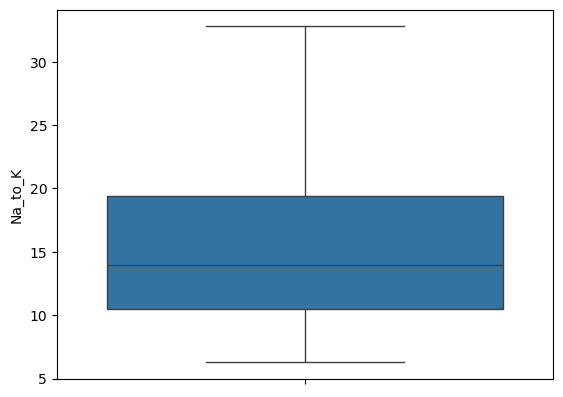

In [64]:
sns.boxplot(df2['Na_to_K'])

In [65]:
df2

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0
...,...,...,...,...,...,...
195,56,0,1,0,11.567,3
196,16,1,1,0,12.006,3
197,52,1,2,0,9.894,4
198,23,1,2,1,14.020,4


In [ ]:
x = df2.drop(columns = 'Drug')
y = df2['Drug']

In [67]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state = 70,test_size = 0.3)

In [68]:
scaler.fit(xtrain)
xtrainscaled = scaler.transform(xtrain)
xtestscaled = scaler.transform(xtest)
model.fit(xtrainscaled,ytrain)
logic = model.score(xtestscaled,ytest)

In [69]:
dt.fit(xtrainscaled,ytrain)
decision = dt.score(xtestscaled,ytest)

In [70]:
df2.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [83]:
ypred = df2.head(1).drop(columns = 'Drug')

In [84]:
ypred

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355


In [85]:
model.predict(ypred)

D:\Application Programs\Anaconda\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([0])

In [86]:
dt.predict(ypred)

D:\Application Programs\Anaconda\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


array([0])

In [87]:
print("Logistic Regression:",logic)
print("DecisionTree Classifier:",decision)

Logistic Regression: 0.9166666666666666
DecisionTree Classifier: 1.0
